# Regression


In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
#Dataset
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model year','Origin']
dataset=pd.read_csv(url,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
#clean dataset
dataset=dataset.dropna() #Excluding missing nos
#convert categorical data in one hot data
origin=dataset.pop('Origin')
dataset['USA']=(origin==1)*1
dataset['India']=(origin==2)*1
dataset['China']=(origin==3)*1

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,USA,India,China
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
#Spliting into training and test set
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)
print(dataset.shape,train_dataset.shape,test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
India,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
China,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Spliting the labels
train_features=train_dataset.copy()
test_features=test_dataset.copy()
train_labels=train_features.pop('MPG')
test_labels=test_features.pop('MPG')

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

In [ ]:
#Normalizing
print(train_dataset.describe().transpose()[['mean','std']])
#Normalization layer
normalizer=preprocessing.Normalization()
#Adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model year      75.898089    3.675642
USA              0.624204    0.485101
India            0.178344    0.383413
China            0.197452    0.398712
[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
 7.5898087e+01 6.2420380e-01 1.7834395e-01 1.9745223e-01]


In [ ]:
#when the layer is called it returns the input data ith each feature independently normalized
first=np.array(train_features[:1])
print('First example: ',first)
print('Normalized',normalizer(first).numpy())

First example:  [[4.000e+00 9.000e+01 7.500e+01 2.125e+03 1.450e+01 7.400e+01 1.000e+00
  0.000e+00 0.000e+00]]
Normalized [[-0.87073565 -1.0110704  -0.78530395 -1.0269395  -0.3803653  -0.5172201
   0.77591294 -0.46589085 -0.49601588]]


In [ ]:
#Regression
#Normalize the input horsepower
#Apply linear regression
feature='Horsepower'
single_feature=np.array(train_features[feature])
print(single_feature.shape,train_features.shape)

(314,) (314, 9)


In [ ]:
#Normalizing only horsepower
single_normalizer=preprocessing.Normalization()
#Adapt to the data
single_normalizer.adapt(single_feature)

In [ ]:
#Sequential model
single_feature_model=keras.models.Sequential([
                                             single_normalizer,
                                             layers.Dense(units=1)
])

In [ ]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
#Loss and optimizer
loss=keras.losses.MeanAbsoluteError()
optim=keras.optimizers.Adam(learning_rate=0.1)
single_feature_model.compile(optimizer=optim,loss=loss)

In [ ]:
history=single_feature_model.fit(
    train_features[feature],train_labels,epochs=100,verbose=1,validation_split=0.2
)

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 22.8648 - val_loss: 22.9381
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22.0618 - val_loss: 22.1381
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 21.2635 - val_loss: 21.3384
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 20.4614 - val_loss: 20.5384
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 19.6643 - val_loss: 19.7381
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 18.8612 - val_loss: 18.9381
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 18.0622 - val_loss: 18.1383
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 17.2621 - val_loss: 17.3383
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 16.4653 - val_loss: 16.5386
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 15.6659 - val_loss: 15.7413
Epoch 11

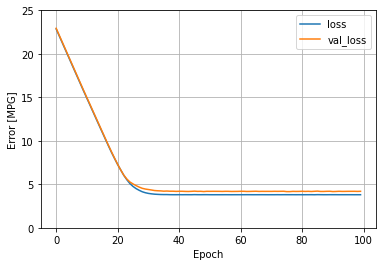

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [ ]:
single_feature_model.evaluate(
    test_features[feature],test_labels,verbose=1
)

3/3 [==============================] - 0s 2ms/step - loss: 3.6461


3.646068572998047

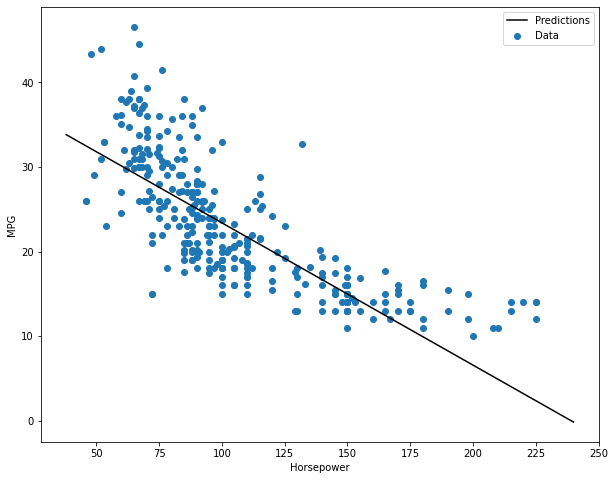

In [ ]:
#predict
range_min=np.min(test_features[feature])-10
range_max=np.max(test_features[feature])+10
x=tf.linspace(range_min,range_max,200)
y=single_feature_model.predict(x)
plot(feature,x,y)

In [ ]:
#Deep neural network
dnn_model=keras.Sequential([
                            single_normalizer,
                            layers.Dense(64,activation='relu'),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(1)
])

In [ ]:
dnn_model.compile(loss=loss,optimizer=keras.optimizers.Adam(0.001))
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
dnn_model.fit( train_features[feature],train_labels,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 23.0573 - val_loss: 23.4497
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.8424 - val_loss: 23.2032
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 22.5909 - val_loss: 22.9064
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 22.2753 - val_loss: 22.5127
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 21.8444 - val_loss: 21.9750
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 21.2586 - val_loss: 21.2729
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 20.5049 - val_loss: 20.3606
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 19.5143 - val_loss: 19.1876
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 18.2987 - val_loss: 17.8059
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 16.9321 - val_loss: 16.3019
Epoch 11

In [ ]:
dnn_model.evaluate(test_features[feature],test_labels,verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2.9291


2.92905592918396

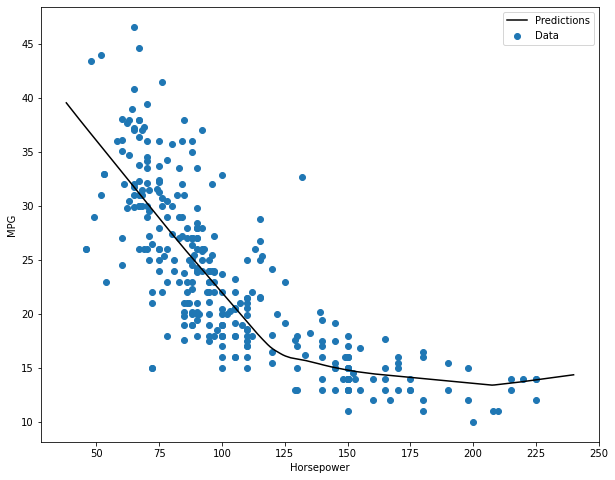

In [ ]:
#predict
x=tf.linspace(range_min,range_max,200)
y=dnn_model.predict(x)
plot(feature,x,y)

In [ ]:
linear_model=tf.keras.Sequential([
                                  normalizer,
                                  layers.Dense(units=1)
])
linear_model.compile(optimizer=keras.optimizers.Adam(0.1),loss=loss)

In [ ]:
linear_model.fit(train_features,train_labels,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 22.9332 - val_loss: 23.0089
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22.0567 - val_loss: 22.2455
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 21.2371 - val_loss: 21.5142
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 20.4234 - val_loss: 20.7920
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 19.6118 - val_loss: 20.0635
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 18.7724 - val_loss: 19.3476
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 17.9785 - val_loss: 18.6226
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 17.1490 - val_loss: 17.8924
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 16.3236 - val_loss: 17.1699
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 15.5108 - val_loss: 16.4572
Epoch 11

In [ ]:
linear_model.evaluate(test_features,test_labels,verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2.5096


2.509626865386963